# Prediction of Liver Disease within Individuals

## Load the dataset

In [1]:
import pandas as pd

file_path = 'Indian_Liver_Patients.csv'
data = pd.read_csv(file_path)

### Explore the dataset

In [2]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
#Get number of records and columns 
data.shape

(583, 11)

In [4]:
#Get data types
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [5]:
#Get number of unique values in each column
data.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

## Perform column conversions

In [6]:
#Rename the column 'Dataset' to 'Target' for identification convenience
data.rename(columns = {'Dataset':'Target'}, inplace = True)

#Replace values in the 'Target' column: 2 -> 0 
data['Target'].replace({2: 0}, inplace = True)

data['Target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 583 entries, 0 to 582
Series name: Target
Non-Null Count  Dtype
--------------  -----
583 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [7]:
#Get counts on the 'Target' variable 
data['Target'].value_counts()

Target
1    416
0    167
Name: count, dtype: int64

## Handle duplicates

In [8]:
#Check for dulpicated count of records
data.duplicated().sum()

13

In [9]:
#Drop them
data = data.drop_duplicates()
data.shape[0]

570

## Handle missing values

In [10]:
#Check for missing values
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [11]:
#Impute the Albumin_and_Globulin_Ratio column with mean
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace = True)
#Verification
data.isnull().sum().sum()

0

## Encode categorical variables

In [12]:
## 'Gender'
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})
#Verification
print(data['Gender'].unique()) 
print(data.dtypes)

[0 1]
Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Target                          int64
dtype: object


## Check for outliers through boxplots 

In [13]:
numerical_cols = data.drop(columns = ['Gender', 'Target'])

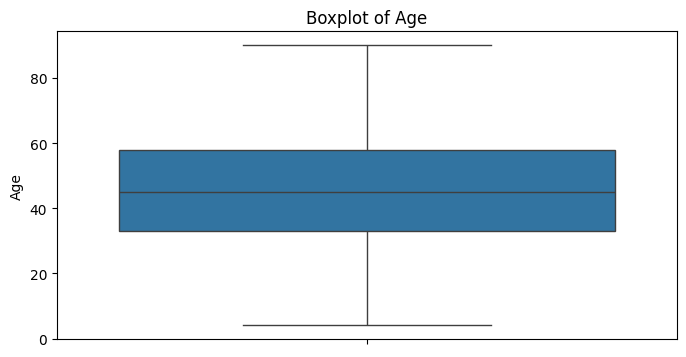

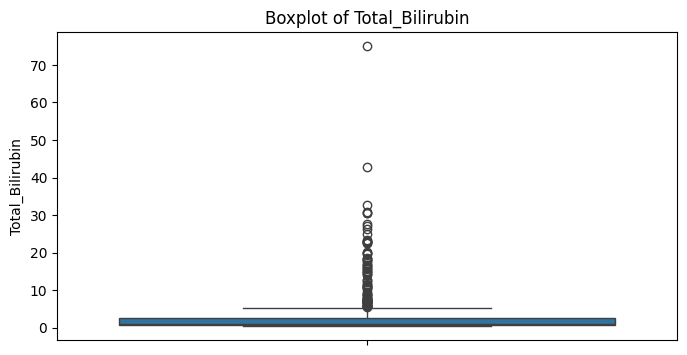

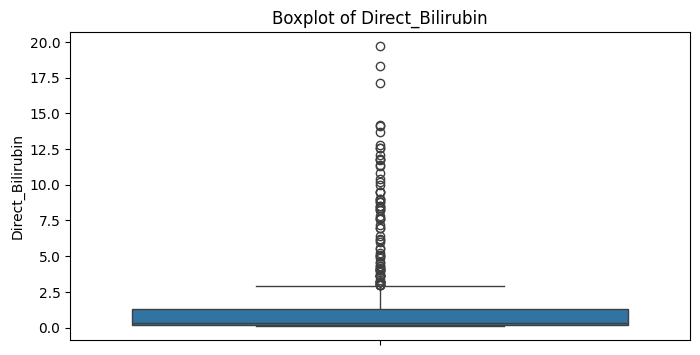

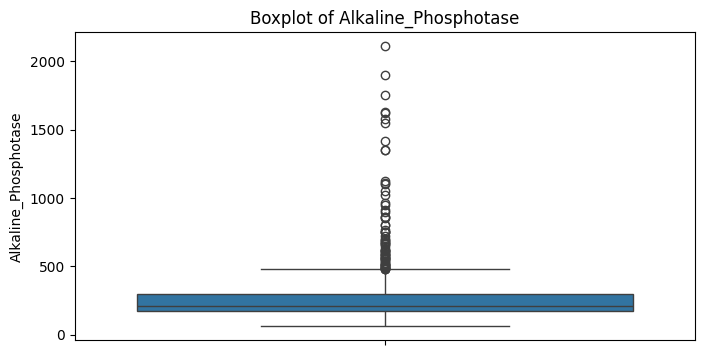

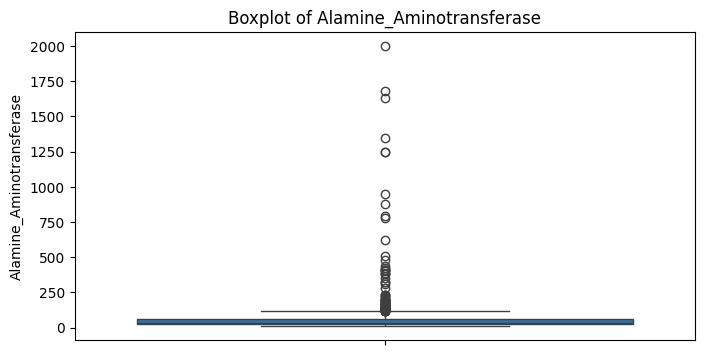

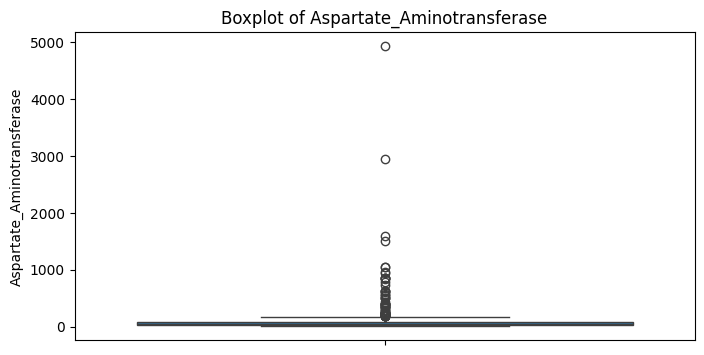

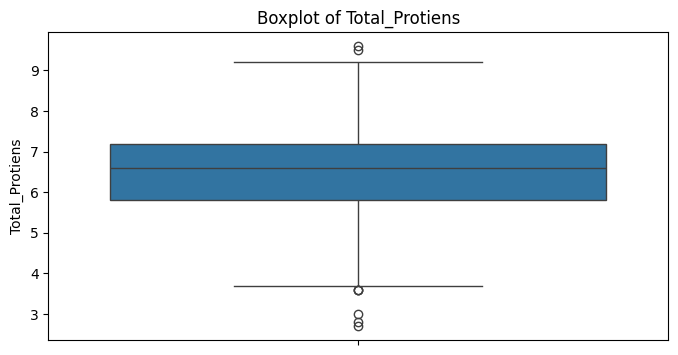

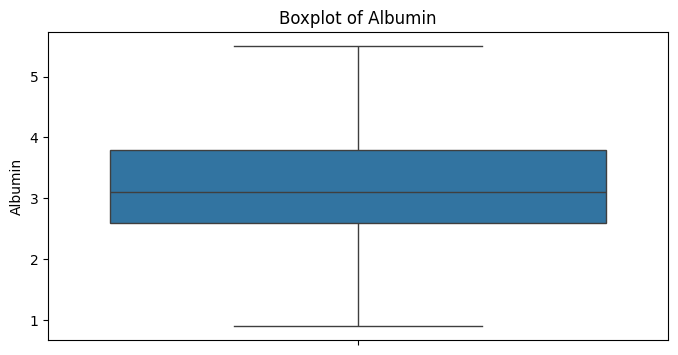

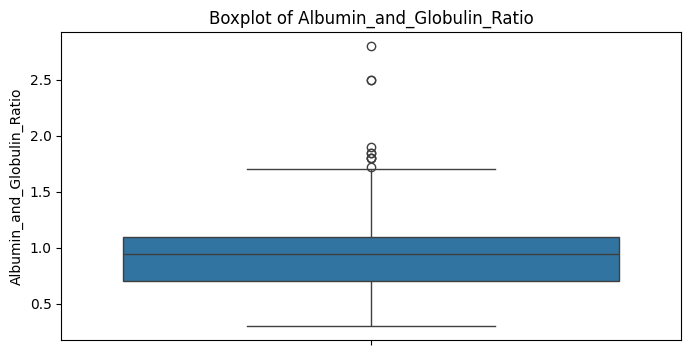

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize = (8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
#Detect considerable amount of oultiers
#Perform robust scaling 

## Numerical data - Robust scaling

In [16]:
from sklearn.preprocessing import RobustScaler

numerical_names = data.drop(columns = ['Gender', 'Target']).columns

scaler = RobustScaler()
data[numerical_names] = scaler.fit_transform(data[numerical_names])
data[numerical_names] = pd.DataFrame(data[numerical_names], columns = numerical_names)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,0.80,0,-0.166667,-0.181818,-0.172131,-0.513514,-0.372470,0.142857,0.166667,-0.120009,1
1,0.68,1,5.500000,4.727273,4.024590,0.783784,0.955466,0.642857,0.083333,-0.520009,1
2,0.68,1,3.500000,3.454545,2.311475,0.675676,0.437247,0.285714,0.166667,-0.145009,1
3,0.52,1,0.000000,0.090909,-0.213115,-0.567568,-0.340081,0.142857,0.250000,0.129991,1
4,1.08,1,1.611111,1.545455,-0.106557,-0.216216,0.291498,0.500000,-0.583333,-1.370009,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.60,1,-0.277778,-0.181818,2.393443,-0.405405,-0.113360,-0.500000,-1.250000,-1.445009,0
579,-0.20,1,-0.222222,-0.181818,-0.901639,0.000000,-0.161943,-0.428571,0.083333,0.379991,1
580,0.28,1,-0.111111,-0.090909,0.303279,0.351351,0.129555,-0.142857,0.083333,0.129991,1
581,-0.56,1,0.166667,0.181818,-0.196721,-0.162162,-0.145749,0.142857,0.250000,0.129991,1


### Distribution of existence of liver disease

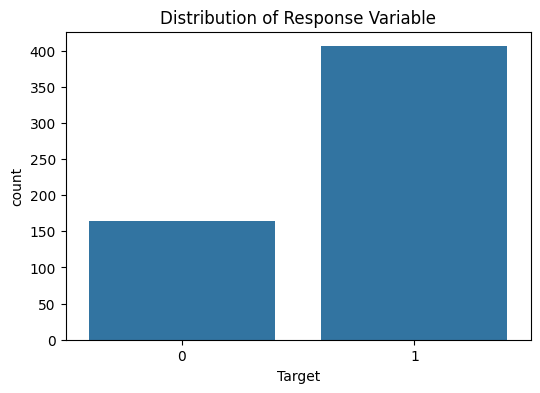

In [17]:
plt.figure(figsize = (6, 4))
sns.countplot(data = data, x = 'Target')
plt.title('Distribution of Response Variable')
plt.show()

#Detect heavy class imbalancement

## Correlation matrix

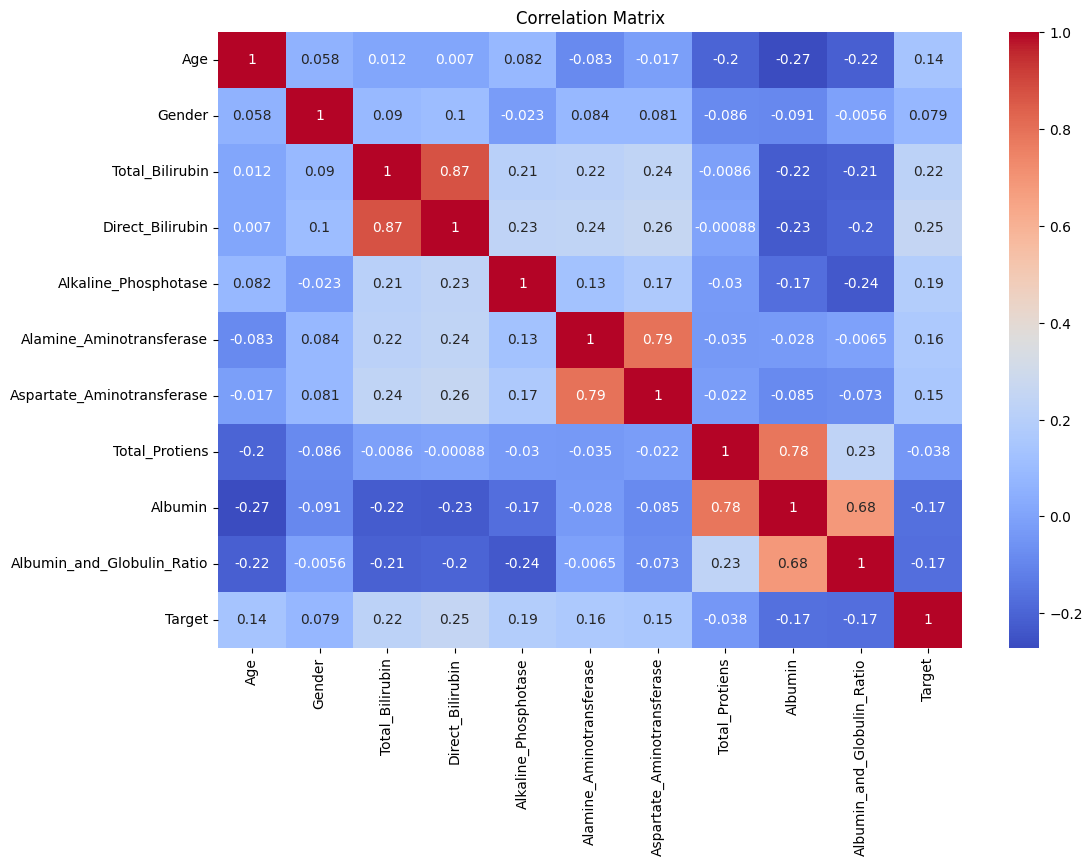

In [18]:
plt.figure(figsize = (12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Drop one of the highly correlated columns

In [19]:
data = data.drop(columns = ['Direct_Bilirubin'])
data.shape

(570, 10)

## Pair plot distributions

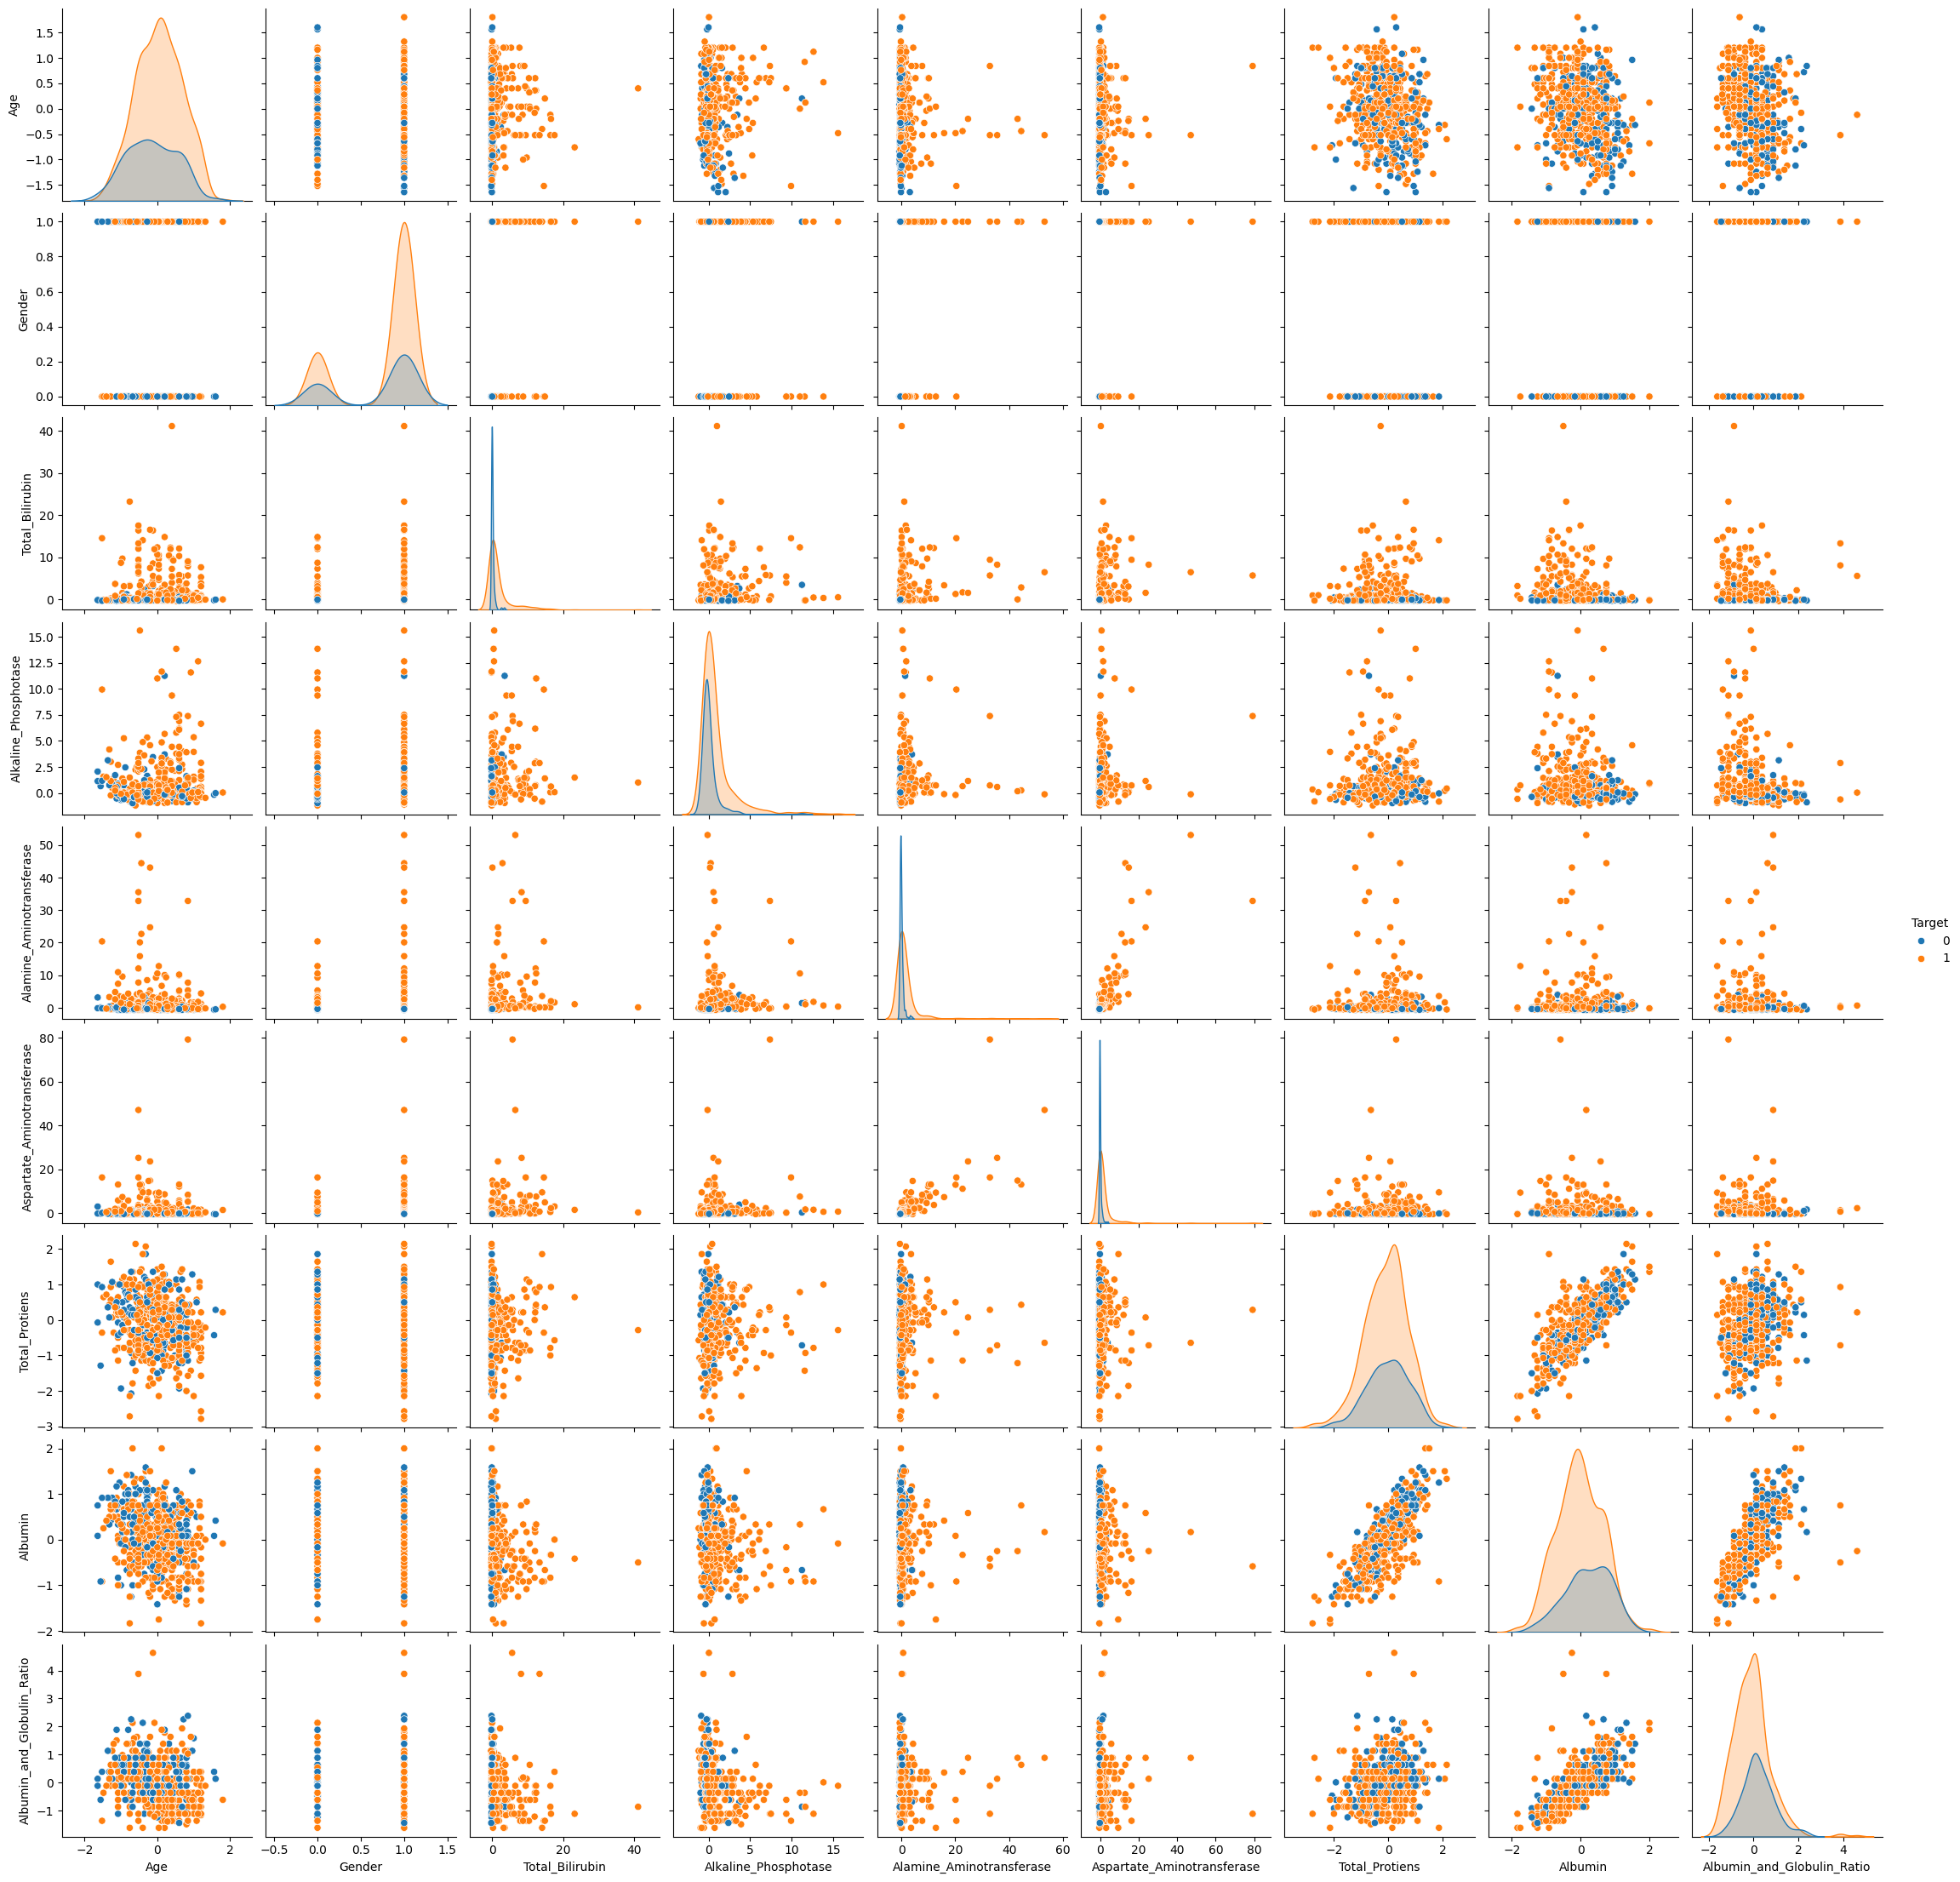

In [20]:
sns.pairplot(data, hue = 'Target', diag_kind = 'kde')
plt.show()

## Split the data into train and test

In [21]:
from sklearn.model_selection import train_test_split
from collections import Counter

X = data.drop('Target', axis = 1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 321, 0: 135})


## Perform SMOTE on response variable

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("SMOTE class distribution:", Counter(y_train))

SMOTE class distribution: Counter({1: 321, 0: 321})


In [23]:
X_train.shape

(642, 9)

## Train models

### 1. Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 42, penalty = 'l2')
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 2. Random Forest Classifier model

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3. Support Vector Machine (SVM) model

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state = 42)
svm.fit(X_train, y_train)

SVC(random_state=42)

### 4. K Nearest Neighbors (KNN) Classifier Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### 5. XGBoost Classifier Model

In [28]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Hyperparameter tuning & Cross Validation for models

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

### 1. Logistic Regression model

In [30]:
#Define hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10], #Regularization strength; inversely proportional to C
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], #Algorithm used in optimization
}

#Perform GridSearchCV
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv = 5, n_jobs = -1, scoring = 'accuracy')
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_
print("LR best parameters: ", best_lr_params)

LR best parameters:  {'C': 0.1, 'solver': 'newton-cg'}


### 2. Random Forest Classifier model

In [31]:
#Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [500, 600, 700], #No of trees in the forest
    'max_depth': [None, 10, 20], #Maximum depth of the tree
    #None means nodes are expanded until all leaves are pure
    'min_samples_split': [0.5, 1.0, 2, 5], #Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], #Minimum number of samples required to be at a leaf node
}

#Perform GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_
print("RF best parameters: ", best_rf_params)

RF best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}


### 3. Support Vector Machine model

In [32]:
#Define hyperparameter grids
param_grid_svm = {
    'C': [800, 900, 1000, 1100], #Regularization strength; inversely proportional to C
    'gamma': ['scale', 'auto'], #Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], #Kernel type to be used
}

#Perform GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_
print("SVM best parameters: ", best_svm_params)

SVM best parameters:  {'C': 900, 'gamma': 'auto', 'kernel': 'rbf'}


### 4. K Nearest Neighbours Model

In [33]:
#Define hyperparameter grids
param_grid_knn = {
    'n_neighbors': [1, 2, 3], #Number of default neighbors
    'weights': ['uniform', 'distance'], #Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'], #Distance metric to use for the tree
}

#Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
print("KNN best parameters: ", best_knn_params)

KNN best parameters:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


### 5. XGBoost Classifier Model

In [34]:
#Define hyperparameter grids
param_grid_xgb = {
    'n_estimators': [60, 70, 80, 90, 100],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Learning rate
    'max_depth': [7, 8, 9, 10],  # Maximum depth of the tree
    'subsample': [0.5, 0.6, 0.7, 0.8],  # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1],  # L1 regularization
    'reg_lambda': [1, 0.1]  # L2 regularization
}

#Perform GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv = cv, n_jobs = -1, scoring = 'accuracy')
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print("XGB best parameters: ", best_xgb_params)

XGB best parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 70, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.7}


## Predictions & Evaluations on train data

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 1. Logistic Regression model

In [36]:
#Predict
y_pred_lr_tr = best_lr.predict(X_train) 

#Evaluate
print("Logistic Regression Model (Training Data):")
print("Accuracy:", accuracy_score(y_train, y_pred_lr_tr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_lr_tr))

Logistic Regression Model (Training Data):
Accuracy: 72.42990654205607
Confusion Matrix:
 [[275  46]
 [131 190]]


### 2. Random Forest Classifier model

In [37]:
#Predict
y_pred_rf_tr = best_rf.predict(X_train)

#Evaluate
print("Random Forest Classifier Model (Training Data):")
print("Accuracy:", accuracy_score(y_train, y_pred_rf_tr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_rf_tr))

Random Forest Classifier Model (Training Data):
Accuracy: 100.0
Confusion Matrix:
 [[321   0]
 [  0 321]]


### 3. Support Vector Machine model

In [38]:
#Predict
y_pred_svm_tr = best_svm.predict(X_train)

#Evaluate 
print("SVM Model (Training Data):")
print("Accuracy:", accuracy_score(y_train, y_pred_svm_tr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_svm_tr))

SVM Model (Training Data):
Accuracy: 94.70404984423676
Confusion Matrix:
 [[319   2]
 [ 32 289]]


### 4. K Nearest Neighbours Model

In [39]:
#Predict
y_pred_knn_tr = best_knn.predict(X_train)

#Evaluate
print("KNN Model (Training Data):")
print("Accuracy:", accuracy_score(y_train, y_pred_knn_tr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_knn_tr))

KNN Model (Training Data):
Accuracy: 100.0
Confusion Matrix:
 [[321   0]
 [  0 321]]


### 5. XGBoost Classifier Model

In [40]:
#Predict
y_pred_xgb_tr = best_xgb.predict(X_train)

#Evaluate 
print("XGBoost Classifier Model (Training Data):")
print("Accuracy:", accuracy_score(y_train, y_pred_xgb_tr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_xgb_tr))

XGBoost Classifier Model (Training Data):
Accuracy: 100.0
Confusion Matrix:
 [[321   0]
 [  0 321]]


## Predictions & Evaluations on test data

### 1. Logistic Regression model

In [41]:
#Predict
y_pred_lr = best_lr.predict(X_test) 

#Evaluate
print("Logistic Regression Model (Testing Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:", classification_report(y_test, y_pred_lr))

Logistic Regression Model (Testing Data):
Accuracy: 62.28070175438597
Confusion Matrix:
 [[22  7]
 [36 49]]
Classification Report:               precision    recall  f1-score   support

           0       0.38      0.76      0.51        29
           1       0.88      0.58      0.70        85

    accuracy                           0.62       114
   macro avg       0.63      0.67      0.60       114
weighted avg       0.75      0.62      0.65       114



### 2. Random Forest Classifier model

In [42]:
#Predict
y_pred_rf = best_rf.predict(X_test) 

#Evaluate
print("Random Forest Classifier model (Testing Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:", classification_report(y_test, y_pred_rf))

Random Forest Classifier model (Testing Data):
Accuracy: 72.80701754385966
Confusion Matrix:
 [[17 12]
 [19 66]]
Classification Report:               precision    recall  f1-score   support

           0       0.47      0.59      0.52        29
           1       0.85      0.78      0.81        85

    accuracy                           0.73       114
   macro avg       0.66      0.68      0.67       114
weighted avg       0.75      0.73      0.74       114



### 3. Support Vector Machine model

In [43]:
#Predict
y_pred_svm = best_svm.predict(X_test) 

#Evaluate
print("Support Vector Machine model (Testing Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:", classification_report(y_test, y_pred_svm))

Support Vector Machine model (Testing Data):
Accuracy: 68.42105263157895
Confusion Matrix:
 [[17 12]
 [24 61]]
Classification Report:               precision    recall  f1-score   support

           0       0.41      0.59      0.49        29
           1       0.84      0.72      0.77        85

    accuracy                           0.68       114
   macro avg       0.63      0.65      0.63       114
weighted avg       0.73      0.68      0.70       114



### 4. K Nearest Neighbours Model

In [44]:
#Predict
y_pred_knn = best_knn.predict(X_test) 

#Evaluate
print("K Nearest Neighbours Model (Testing Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:", classification_report(y_test, y_pred_knn))

K Nearest Neighbours Model (Testing Data):
Accuracy: 66.66666666666666
Confusion Matrix:
 [[15 14]
 [24 61]]
Classification Report:               precision    recall  f1-score   support

           0       0.38      0.52      0.44        29
           1       0.81      0.72      0.76        85

    accuracy                           0.67       114
   macro avg       0.60      0.62      0.60       114
weighted avg       0.70      0.67      0.68       114



### 5. XGBoost Classifier Model

In [45]:
#Predict
y_pred_xgb = best_xgb.predict(X_test) 

#Evaluate
print("XGBoost Classifier Model (Testing Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:", classification_report(y_test, y_pred_xgb))

XGBoost Classifier Model (Testing Data):
Accuracy: 72.80701754385966
Confusion Matrix:
 [[16 13]
 [18 67]]
Classification Report:               precision    recall  f1-score   support

           0       0.47      0.55      0.51        29
           1       0.84      0.79      0.81        85

    accuracy                           0.73       114
   macro avg       0.65      0.67      0.66       114
weighted avg       0.74      0.73      0.73       114



## Conclusion

In [46]:
'''
According to the highest accuracy and other evaluation metrics like precision, recall and 
F1-score, the most suitable models would be RF and XGBoost. (with around 72% of accuracy)
'''

'\nAccording to the highest accuracy and other evaluation metrics like precision, recall and \nF1-score, the most suitable models would be RF and XGBoost. (with around 72% of accuracy)\n'

## Combine predictions of RF and XGBoost models using an ensemble method - Voting Classifier 

In [47]:
from sklearn.ensemble import VotingClassifier

estimators = [('rf_clf', best_rf), ('xgb', best_xgb)]
voting_clf = VotingClassifier(estimators = estimators, voting = 'soft') 
#"Soft" - For voting in averaging probabilities
voting_clf.fit(X_train, y_train)

#Make predictions
y_pred_voting_clf = voting_clf.predict(X_test)

#Evaluate the ensemble model
print("Voting Classifier Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting_clf) * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting_clf))
print("Classification Report:\n", classification_report(y_test, y_pred_voting_clf))

Voting Classifier Model:
Accuracy: 73.68421052631578
Confusion Matrix:
 [[16 13]
 [17 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.55      0.52        29
           1       0.84      0.80      0.82        85

    accuracy                           0.74       114
   macro avg       0.66      0.68      0.67       114
weighted avg       0.75      0.74      0.74       114



## Predict a new observation (whether an individual is a patient or not)

In [48]:
import numpy as np

feature_names = ['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
                 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens',
                 'Albumin', 'Albumin_and_Globulin_Ratio']
new_obs = np.array([[0.5, 0, 0.3, 0.1, -0.1, 0.2, 0.3, 0.2, 0.1]])

new_obs_data = pd.DataFrame(new_obs, columns = feature_names)

#Predicting using RF and XGBoost models seperately
pred_rf = best_rf.predict(new_obs_data)
print("RF Prediction: ", pred_rf[0])
pred_xgb = best_xgb.predict(new_obs_data)
print("XGB Prediction: ", pred_xgb[0])

#Predicting using ensemble model
predict_voting = voting_clf.predict(new_obs_data)
print("Ensemble Model Prediction ", predict_voting[0])

RF Prediction:  1
XGB Prediction:  1
Ensemble Model Prediction  1


### The combined model predicts that the individual with given diagnosis is a patient.